# Dataset Bigram Types

Load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

COLORS = {
    'BIG': '#66CDAA',
    'CVS': '#FF0000',
    'JLT': '#FFD700',
    'MNY': '#C71585',
    'NTR': '#00FF00',
    'TBO': '#0000FF',
    'VDC': '#1E90FF',
    'WILD': '#000000',
}

plt.style.use(['science', 'no-latex' ])

# Load and order columns
start = ['bigram_type', 'WILD']
df = pd.read_csv('data/by_dataset/bigram_type.csv')
df = df[start + [ c for c in df.columns if c not in start ]]
df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)
df

,bigram_type,WILD,BIG,CVS,JLT,MNY,NTR,TBO,VDC
0,-<<>>+,463,1,0,0,1900,0,0,4
1,"typename<<>>,",8533,1,120,0,288,0,0,277
2,new<<>>&=,1815,1,0,0,0,0,0,9
3,AndAnd<<>>=,1707,1,0,0,0,0,0,16
4,int<<>>OrOr,3462,1,0,0,0,0,0,17
...,...,...,...,...,...,...,...,...,...
8269,=<<>>default,88283,0,0,0,0,0,0,0
8270,const<<>>noexcept,105450,0,0,0,0,0,0,0
8271,)<<>>noexcept,205877,0,0,0,0,0,0,0
8272,namespace<<>>{,221850,0,0,0,0,0,0,0


## Missing Tokens
Print missing tokens for each dataset.

In [50]:
from IPython.display import HTML

# Get the WILD token frequency
freq = df.WILD / df.WILD.sum()

f = df.iloc[:, 1:] / df.iloc[:, 1:].sum()
f = (f.WILD > 0) * f.WILD + (f.WILD == 0) * f.iloc[:, 1:].sum(axis=1)
print(f[df.WILD == 0].sum().round(3))

# Find the missing tokens and calculate their frequency.
missing = df.copy()
missing.iloc[:, 1:] = (missing.iloc[:, 1:] == 0).astype(int)

tmp = pd.DataFrame()
tmp['count'] = missing.iloc[:, 1:].sum()
tmp['%'] = missing.iloc[:, 1:].sum() / df.shape[0]
tmp['used %'] = missing.iloc[:, 1:].multiply(freq, axis=0).sum().sort_values()
# tmp['tokens'] = [ ', '.join(missing.bigram_type[missing[c] == 1]) for c in missing.columns[1:] ]
tmp = tmp.sort_values(by='used %')
tmp.style.format({ '%': '{:.1%}', 'used %': '{:.3%}' })

0.0


,count,%,used %
WILD,79,1.0%,0.000%
VDC,4848,58.6%,0.054%
BIG,6138,74.2%,0.055%
MNY,5431,65.6%,0.106%
CVS,6733,81.4%,0.320%
JLT,7716,93.3%,4.651%
TBO,8068,97.5%,19.326%
NTR,8145,98.4%,42.051%


## Percent Difference with WILD
Normalize by the most frequent token.

In [17]:
norm = df.copy()
norm.iloc[:, 1:] /= norm.iloc[:, 1:].max()
norm = norm.sort_values(by='WILD', ascending=False)
norm

,bigram_type,WILD,BIG,CVS,JLT,MNY,NTR,TBO,VDC
2086,"IntegerLiteral<<>>,",1.000000,0.058098,0.260760,0.028303,6.843717e-01,0.000000,0.001732,4.897069e-02
2094,",<<>>IntegerLiteral",0.986068,0.067828,0.262723,0.056622,6.202772e-01,0.000000,0.018398,5.804631e-02
2134,Identifier<<>>(,0.925047,0.985663,0.769259,1.000000,7.764737e-01,0.838532,0.325541,9.069656e-01
2135,(<<>>Identifier,0.912615,1.000000,1.000000,0.501846,8.542533e-01,0.790826,0.273593,1.000000e+00
2133,Identifier<<>>),0.843118,0.869573,0.798941,0.420178,7.100957e-01,0.944954,0.195671,8.546003e-01
...,...,...,...,...,...,...,...,...,...
3381,mutable<<>>OrOr,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,8.123763e-08
2370,<<<>>case,0.000000,0.000000,0.000000,0.000000,1.073817e-07,0.000000,0.000000,0.000000e+00
2705,>=<<>>.,0.000000,0.000000,0.000000,0.000000,4.295266e-07,0.000000,0.000000,0.000000e+00
3384,>=<<>>operator,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,8.123763e-08


Calculate the percent difference between each dataset and WILD.

In [18]:
df_diff = norm.loc[:, norm.columns != 'WILD'].copy()
df_diff.iloc[:, 1:] = df_diff.iloc[:, 1:].subtract(norm.WILD, axis=0).div(norm.WILD, axis=0)
df_diff = df_diff.replace(-1, np.nan)

display(df_diff.iloc[:, 1:].abs().describe().round(1))

,BIG,CVS,JLT,MNY,NTR,TBO,VDC
count,2136.0,1541.0,558.0,2843.0,129.0,206.0,3426.0
mean,inf,5.0,13.4,inf,7.3,6.4,inf
std,NaN,35.1,69.0,NaN,16.9,16.9,NaN
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.3,0.4,0.6,0.5,0.4,0.7,0.3
50%,0.6,0.7,0.9,0.9,0.9,0.9,0.7
75%,0.9,1.2,1.0,3.5,6.5,2.5,1.0
max,inf,1016.4,713.0,inf,109.4,122.2,inf


### Boxplot

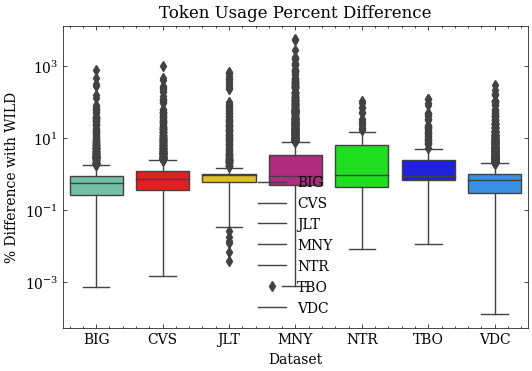

In [5]:
d2 = df_diff.iloc[:, 1:].copy().abs()
fig = plt.figure(figsize=(6, 4), dpi=100)
ax = fig.gca()
sns.boxplot(x='variable', y='value', data=pd.melt(d2), ax=ax, palette=COLORS)
ax.set_yscale('log')
ax.legend(df_diff.columns[1:])
ax.set_xlabel('Dataset')
ax.set_ylabel('% Difference with WILD')
ax.set_title('Token Usage Percent Difference')
plt.show()

In [6]:
display(df_diff.iloc[:, 1:].abs().describe())
display(df_diff.iloc[:, 1:].abs().median().sort_values())

,BIG,CVS,JLT,MNY,NTR,TBO,VDC
count,2136.000000,1541.000000,558.000000,2843.000000,129.000000,206.000000,3426.000000
mean,inf,4.979955,13.410700,inf,7.348875,6.355843,inf
std,NaN,35.065327,68.988958,NaN,16.946638,16.906732,NaN
min,0.000734,0.001468,0.004030,0.000800,0.008203,0.011761,0.000134
25%,0.273573,0.360538,0.613385,0.490968,0.449387,0.715450,0.302139
50%,0.565419,0.723427,0.927826,0.907810,0.947319,0.924045,0.686689
75%,0.905781,1.218406,0.999967,3.531239,6.527688,2.494216,0.990532
max,inf,1016.392635,712.984094,inf,109.415165,122.186811,inf


BIG    0.565419
VDC    0.686689
CVS    0.723427
MNY    0.907810
TBO    0.924045
JLT    0.927826
NTR    0.947319
dtype: float64

In [19]:
df2 = df_diff.copy()
df2.iloc[:, 1:] = df2.iloc[:, 1:]

tops = pd.DataFrame()

for col in df2.columns[1:]:
    sub = df2[['bigram_type', col]].copy()
    sub['abs'] = sub[col].abs()
    sub = sub.sort_values(by='abs', ascending=False)#.drop(columns='abs')
    sub = sub[sub != -1].dropna().head(100)
    tops[(col, 'type')] = sub.bigram_type.values
    tops[(col, '%dif')] = sub[col].values * 100

tops.columns = pd.MultiIndex.from_tuples(tops.columns)
tops.round(1).style.background_gradient(cmap='Spectral')

/opt/conda/lib/python3.8/site-packages/pandas/io/formats/style.py:1268: RuntimeWarning: invalid value encountered in double_scalars
  norm = colors.Normalize(smin - (rng * low), smax + (rng * high))
